In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load digits dataset (similar to MNIST, 8x8 version)
digits = load_digits()
X, y = digits.data, digits.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
from scipy.stats import multivariate_normal

classes = np.unique(y_train)
priors = {}
likelihoods = {}

for cls in classes:
    X_cls = X_train[y_train == cls]
    priors[cls] = X_cls.shape[0] / X_train.shape[0]
    mean = np.mean(X_cls, axis=0)
    cov = np.cov(X_cls, rowvar=False) + 1e-5 * np.eye(X_cls.shape[1])  # for numerical stability
    likelihoods[cls] = multivariate_normal(mean=mean, cov=cov)


In [3]:
def bayes_predict(X):
    y_pred = []
    for x in X:
        posteriors = []
        for cls in classes:
            likelihood = likelihoods[cls].pdf(x)
            posterior = likelihood * priors[cls]
            posteriors.append(posterior)
        y_pred.append(np.argmax(posteriors))
    return np.array(y_pred)



📋 Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.96      0.96      0.96        28
           2       0.94      0.97      0.96        33
           3       1.00      0.91      0.95        34
           4       0.98      1.00      0.99        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.92      1.00      0.96        34
           8       0.94      0.97      0.95        30
           9       0.97      0.88      0.92        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



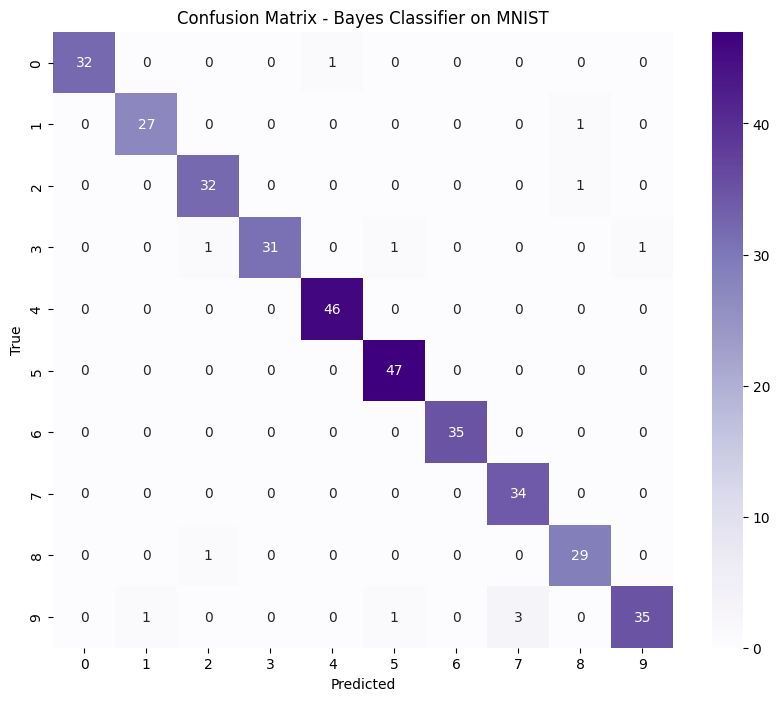

In [4]:
y_pred = bayes_predict(X_test)

print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Bayes Classifier on MNIST")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
